In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from model import print_results, MonoexponentialModel, MonoexponentialModelP, make_exp_data

# Общие параметры моделирования

In [2]:
NUM_EXAMPLES = 1000

# TIME_CONSTANT = 0.2
# TIME_CONSTANT = 0.005
# TIME_CONSTANT = 0.0002
TIME_CONSTANT = 10 ** float(np.random.uniform(low=-3.6, high=-0.7))

# AMPL = 3.0
AMPL = float(np.random.uniform(low=0.1, high=4))

# P_COEF = 1.5
P_COEF = float(np.random.uniform(low=0.5, high=1.5))
print(f'p = {P_COEF:.4f}')

F_PULSE = 20 * 10 ** (-6)

STDDEV = 0.2

LEARNING_RATE = 0.1
EPOCHS = 200

p = 1.2096


# Генерация экспериментальных данных

In [3]:
frequency, actual_dlts = make_exp_data(f_pulse=F_PULSE,
                                       time_constant=TIME_CONSTANT,
                                       ampl=AMPL,
                                       p=P_COEF,
                                       std_dev=STDDEV,
                                       num_ex=NUM_EXAMPLES)

# Модель до оптимизации параметров

Initial values:
Time constant power = -0.7611 log10(s)
Time constant = 0.1733 s
Amplitude = 2.8247 pF
MSE = 2.7539
RMSE = 1.659482


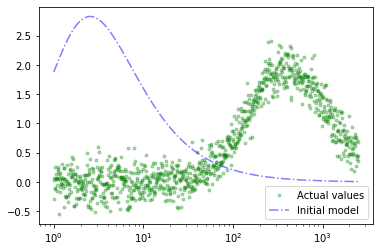

In [4]:
initial_model = MonoexponentialModelP(filling_pulse=F_PULSE)

print_results(frequency = frequency, 
              actual_dlts = actual_dlts,
              initial_model = initial_model)

# Оптимизация модели простым градиентным спуском

Initial values:
Time constant power = -0.7611 log10(s)
Time constant = 0.1733 s
Amplitude = 2.8247 pF
MSE = 2.7539
RMSE = 1.659482

Final values:
Time constant power = -2.9424 log10(s)
Time constant = 0.0011 s
Amplitude = 1.9671 pF
MSE = 0.0418
RMSE = 0.204546


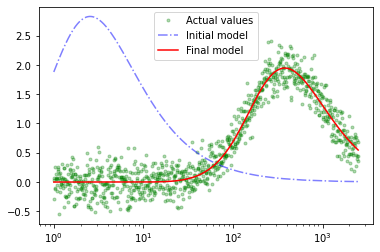

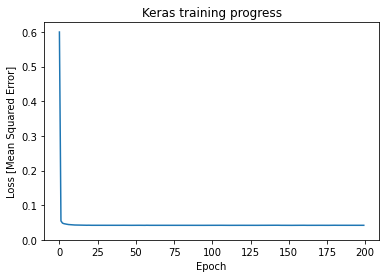

p = 1.2044


In [5]:
final_model = MonoexponentialModelP(filling_pulse=F_PULSE,
                                    time_constant_power = initial_model.time_constant_power.numpy(),
                                    amplitude = initial_model.amplitude.numpy()
                                   )

final_model.compile(run_eagerly=False,
                    loss=tf.keras.losses.MSE,
                    optimizer=tf.optimizers.SGD(learning_rate=LEARNING_RATE))

history = final_model.fit(frequency, actual_dlts, epochs=EPOCHS, batch_size=100, verbose=False)



print_results(frequency = frequency,
              actual_dlts = actual_dlts,
              initial_model = initial_model,
              final_model = final_model,
              history = history
             )

print(f'p = {final_model.p_coef.numpy():.4f}')

# Оптимизация параметров модели алгоритмом Adagrad

Initial values:
Time constant power = -0.7611 log10(s)
Time constant = 0.1733 s
Amplitude = 2.8247 pF
MSE = 2.7539
RMSE = 1.659482

Final values:
Time constant power = -2.9345 log10(s)
Time constant = 0.0012 s
Amplitude = 1.9688 pF
MSE = 0.0417
RMSE = 0.204276


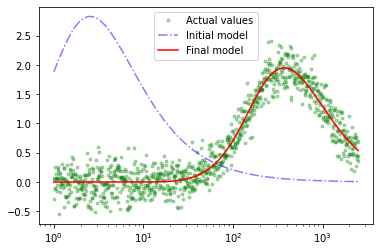

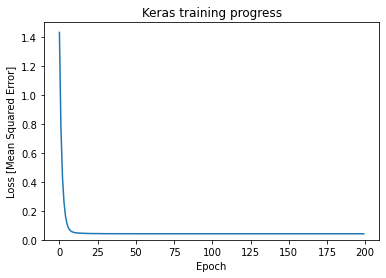

p = 1.2047


In [6]:
final_model = MonoexponentialModelP(filling_pulse=F_PULSE,
                                    time_constant_power = initial_model.time_constant_power.numpy(),
                                    amplitude = initial_model.amplitude.numpy()
                                   )

final_model.compile(run_eagerly=False,
                    loss=tf.keras.losses.MSE,
                    optimizer=tf.optimizers.Adagrad(learning_rate=LEARNING_RATE))

history = final_model.fit(frequency, actual_dlts, epochs=EPOCHS, batch_size=100, verbose=False)

print_results(frequency = frequency,
              actual_dlts = actual_dlts,
              initial_model = initial_model,
              final_model = final_model,
              history = history
             )

print(f'p = {final_model.p_coef.numpy():.4f}')

# Оптимизация параметров модели алгоритмом Adamax

Initial values:
Time constant power = -0.7611 log10(s)
Time constant = 0.1733 s
Amplitude = 2.8247 pF
MSE = 2.7539
RMSE = 1.659482

Final values:
Time constant power = -2.9340 log10(s)
Time constant = 0.0012 s
Amplitude = 1.9706 pF
MSE = 0.0417
RMSE = 0.204285


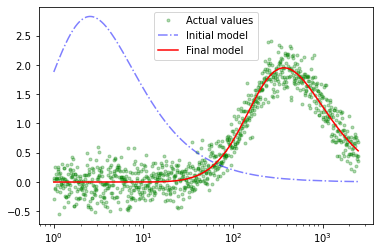

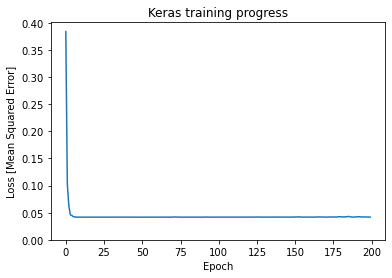

p = 1.2110


In [7]:
final_model = MonoexponentialModelP(filling_pulse=F_PULSE,
                                    time_constant_power = initial_model.time_constant_power.numpy(),
                                    amplitude = initial_model.amplitude.numpy()
                                   )

final_model.compile(run_eagerly=False,
                    loss=tf.keras.losses.MSE,
                    optimizer=tf.optimizers.Adamax(learning_rate=LEARNING_RATE))

history = final_model.fit(frequency, actual_dlts, epochs=EPOCHS, batch_size=100, verbose=False)

print_results(frequency = frequency,
              actual_dlts = actual_dlts,
              initial_model = initial_model,
              final_model = final_model,
              history = history
             )

print(f'p = {final_model.p_coef.numpy():.4f}')